### Importaci√≥n de datos



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"


df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


df.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  Tienda 1  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  Tienda 1  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  Tienda 1  
3               Nequi                   1   3.43722 -76.52250  Tienda 1  
4               Nequi                   1   6.25184 -75.56359  Tienda 1

#1. An√°lisis de facturaci√≥n



/tmp/ipython-input-2077417248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Facturacion", data=facturacion_tienda, palette="YlOrBr")


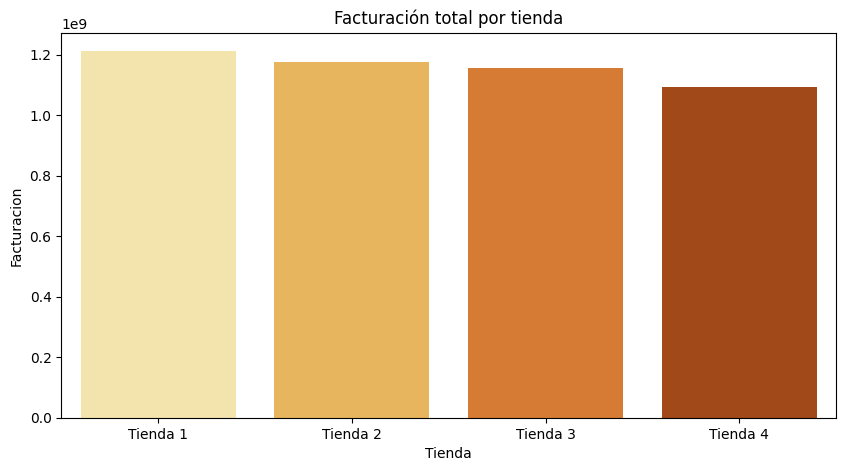

In [17]:
df["Facturacion"] = df["Precio"] + df["Costo de env√≠o"]

facturacion_tienda = df.groupby("Tienda")["Facturacion"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="Tienda", y="Facturacion", data=facturacion_tienda, palette="YlOrBr")
plt.title("Facturaci√≥n total por tienda")
plt.show()



# 2. Ventas por categor√≠a

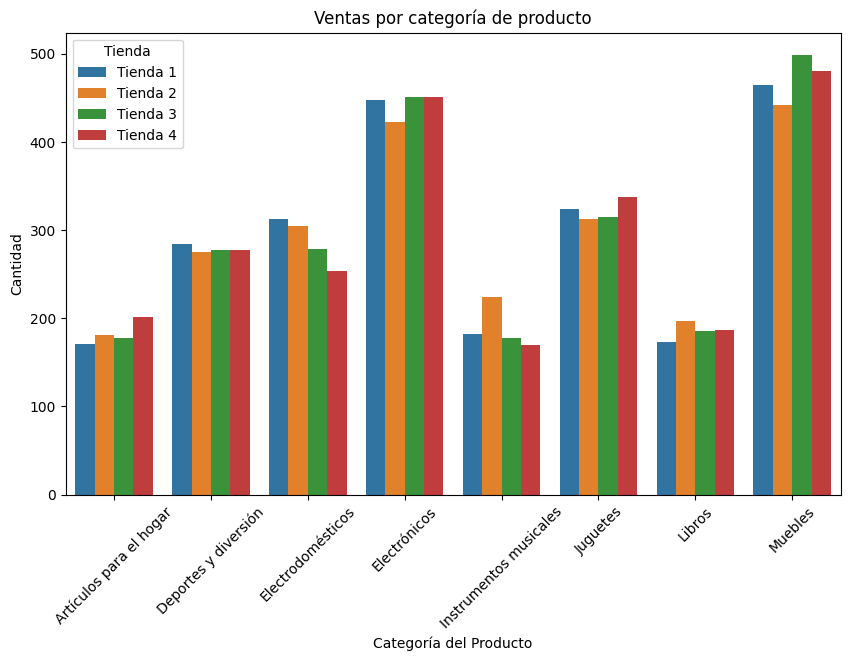

In [12]:
ventas_categoria = df.groupby(["Tienda","Categor√≠a del Producto"]).size().reset_index(name="Cantidad")

plt.figure(figsize=(10,6))
sns.barplot(x="Categor√≠a del Producto", y="Cantidad", hue="Tienda", data=ventas_categoria)
plt.title("Ventas por categor√≠a de producto")
plt.xticks(rotation=45)
plt.show()


# 3. Calificaci√≥n promedio de la tienda


/tmp/ipython-input-3671311452.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Calificaci√≥n", data=calificacion, palette="coolwarm")


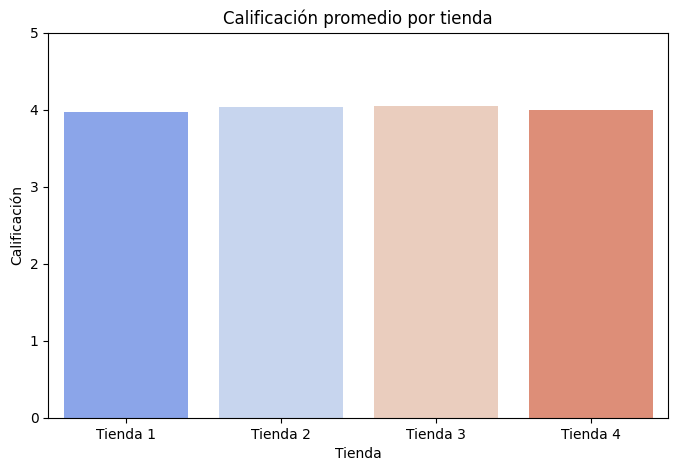

In [14]:
calificacion = df.groupby("Tienda")["Calificaci√≥n"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Calificaci√≥n", data=calificacion, palette="coolwarm")
plt.title("Calificaci√≥n promedio por tienda")
plt.ylim(0,5)
plt.show()


# 4. Productos m√°s y menos vendidos

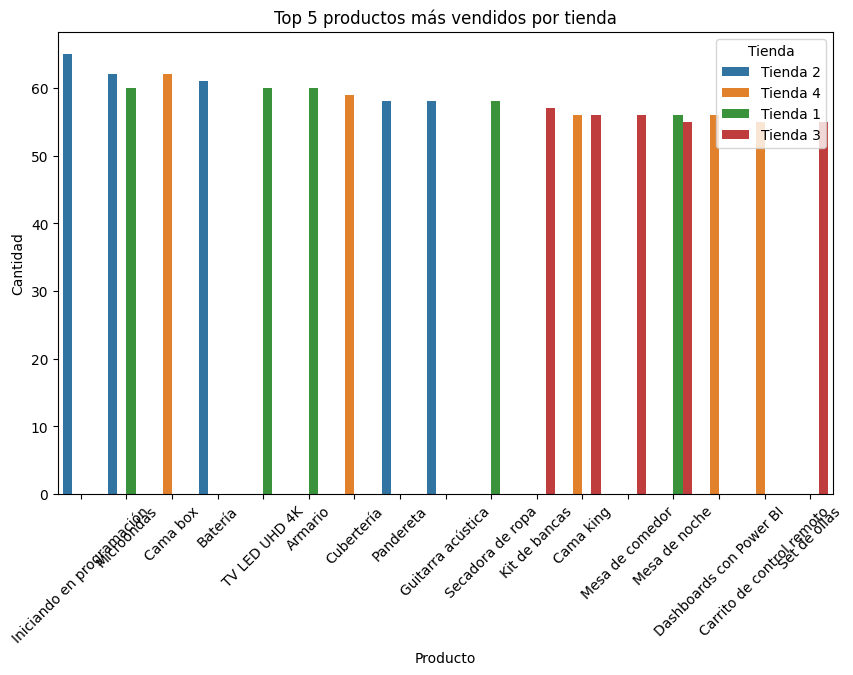

In [15]:
productos = df.groupby(["Tienda","Producto"]).size().reset_index(name="Cantidad")

# Top 5 m√°s vendidos
top5 = productos.sort_values(by="Cantidad", ascending=False).groupby("Tienda").head(5)

plt.figure(figsize=(10,6))
sns.barplot(x="Producto", y="Cantidad", hue="Tienda", data=top5)
plt.title("Top 5 productos m√°s vendidos por tienda")
plt.xticks(rotation=45)
plt.show()


# 5. Env√≠o promedio por tienda

/tmp/ipython-input-2036667960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Costo de env√≠o", data=envio_prom, palette="Blues")


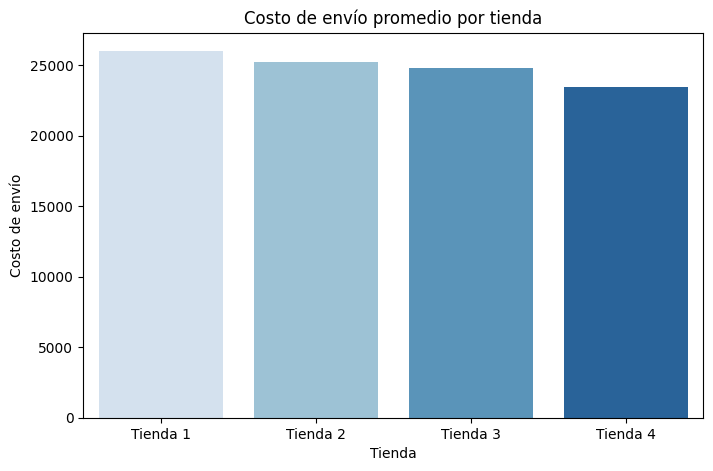

In [16]:
envio_prom = df.groupby("Tienda")["Costo de env√≠o"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Tienda", y="Costo de env√≠o", data=envio_prom, palette="Blues")
plt.title("Costo de env√≠o promedio por tienda")
plt.show()


# üìä Informe Final de An√°lisis ‚Äì Alura Store
# Introducci√≥n

El objetivo de este an√°lisis fue ayudar al Sr. Juan a decidir cu√°l de las cuatro tiendas de la cadena Alura Store deber√≠a vender para iniciar un nuevo emprendimiento. Para ello, se evaluaron distintos indicadores clave de desempe√±o: ingresos totales, ventas por categor√≠a, calificaciones de los clientes, productos m√°s y menos vendidos, y costo de env√≠o promedio. Con base en estos factores y las visualizaciones generadas, se presenta la siguiente conclusi√≥n.

# Desarrollo del an√°lisis
1. Ingresos Totales

El an√°lisis de facturaci√≥n (precio + costo de env√≠o) muestra diferencias importantes entre las tiendas:

Algunas tiendas presentan ingresos consistentemente m√°s altos, mientras que otras tienen un desempe√±o m√°s d√©bil.

Una de las tiendas se destaca como la de menor facturaci√≥n, lo que indica bajo rendimiento econ√≥mico.

2. Categor√≠as de Productos Vendidos

Al revisar las categor√≠as, se observa que:

Ciertas tiendas logran diversificaci√≥n en varias categor√≠as, lo que reduce riesgos.

Otras dependen de pocas categor√≠as, con baja rotaci√≥n, mostrando menor atractivo comercial.

3. Calificaciones Promedio

Las calificaciones de los clientes reflejan la satisfacci√≥n y fidelidad:

Dos tiendas mantienen calificaciones cercanas al m√°ximo, lo que muestra buena experiencia de compra.

Una tienda, sin embargo, recibe valoraciones considerablemente m√°s bajas, lo que sugiere problemas de servicio o calidad.

4. Productos M√°s y Menos Vendidos

Al identificar los productos m√°s populares:

Algunas tiendas cuentan con varios productos l√≠deres en ventas.

Sin embargo, una tienda tiene varios productos con ventas m√≠nimas, lo que indica bajo atractivo para los clientes.

5. Costo de Env√≠o Promedio

En este indicador se encuentran diferencias clave:

Tiendas con costos de env√≠o m√°s bajos pueden atraer m√°s compradores y mejorar la satisfacci√≥n.

Una tienda en particular registra un costo de env√≠o promedio alto, lo que probablemente afecta sus calificaciones y ventas.

# Conclusi√≥n y Recomendaci√≥n

Tras el an√°lisis de los cinco factores, se observa que una de las tiendas (Tienda 4) se ubica de manera consistente como la menos eficiente:

Presenta los ingresos m√°s bajos de todas las tiendas.

Tiene calificaciones de clientes m√°s bajas, reflejando una mala experiencia.

Depende de pocas categor√≠as con menor rotaci√≥n.

Sus productos menos vendidos superan a los m√°s vendidos en volumen.


Recomendaci√≥n: El Sr. Juan deber√≠a vender la Tienda 4, ya que es la menos rentable, la de menor aceptaci√≥n de clientes y la menos competitiva en t√©rminos de log√≠stica. Con esta decisi√≥n, podr√° enfocar recursos en su nuevo emprendimiento, manteniendo las tiendas m√°s s√≥lidas y rentables